<a href="https://colab.research.google.com/github/JVilchis18/Project-Euler-proyecto-final/blob/master/Tarea_EstadIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.El método más utilizado para estimar los parámetros de una serie de tiempo es llamado "Método de Máxima
Verosimilitud", el cual consiste en maximizar la función de log-verosimilitud correspondiente a una muestra
aleatoria. Como ejemplo, tomemos un proceso AR(1). Asumiendo una distribución Gaussiana para el ruido
blanco:
$$X_t|X_{t-1} ~ N(ΦX_{t-1},σ^2)$$
Encuentre los estimadores de $Φ$ & $σ$ utilizando el método de máxima verosimilitud.

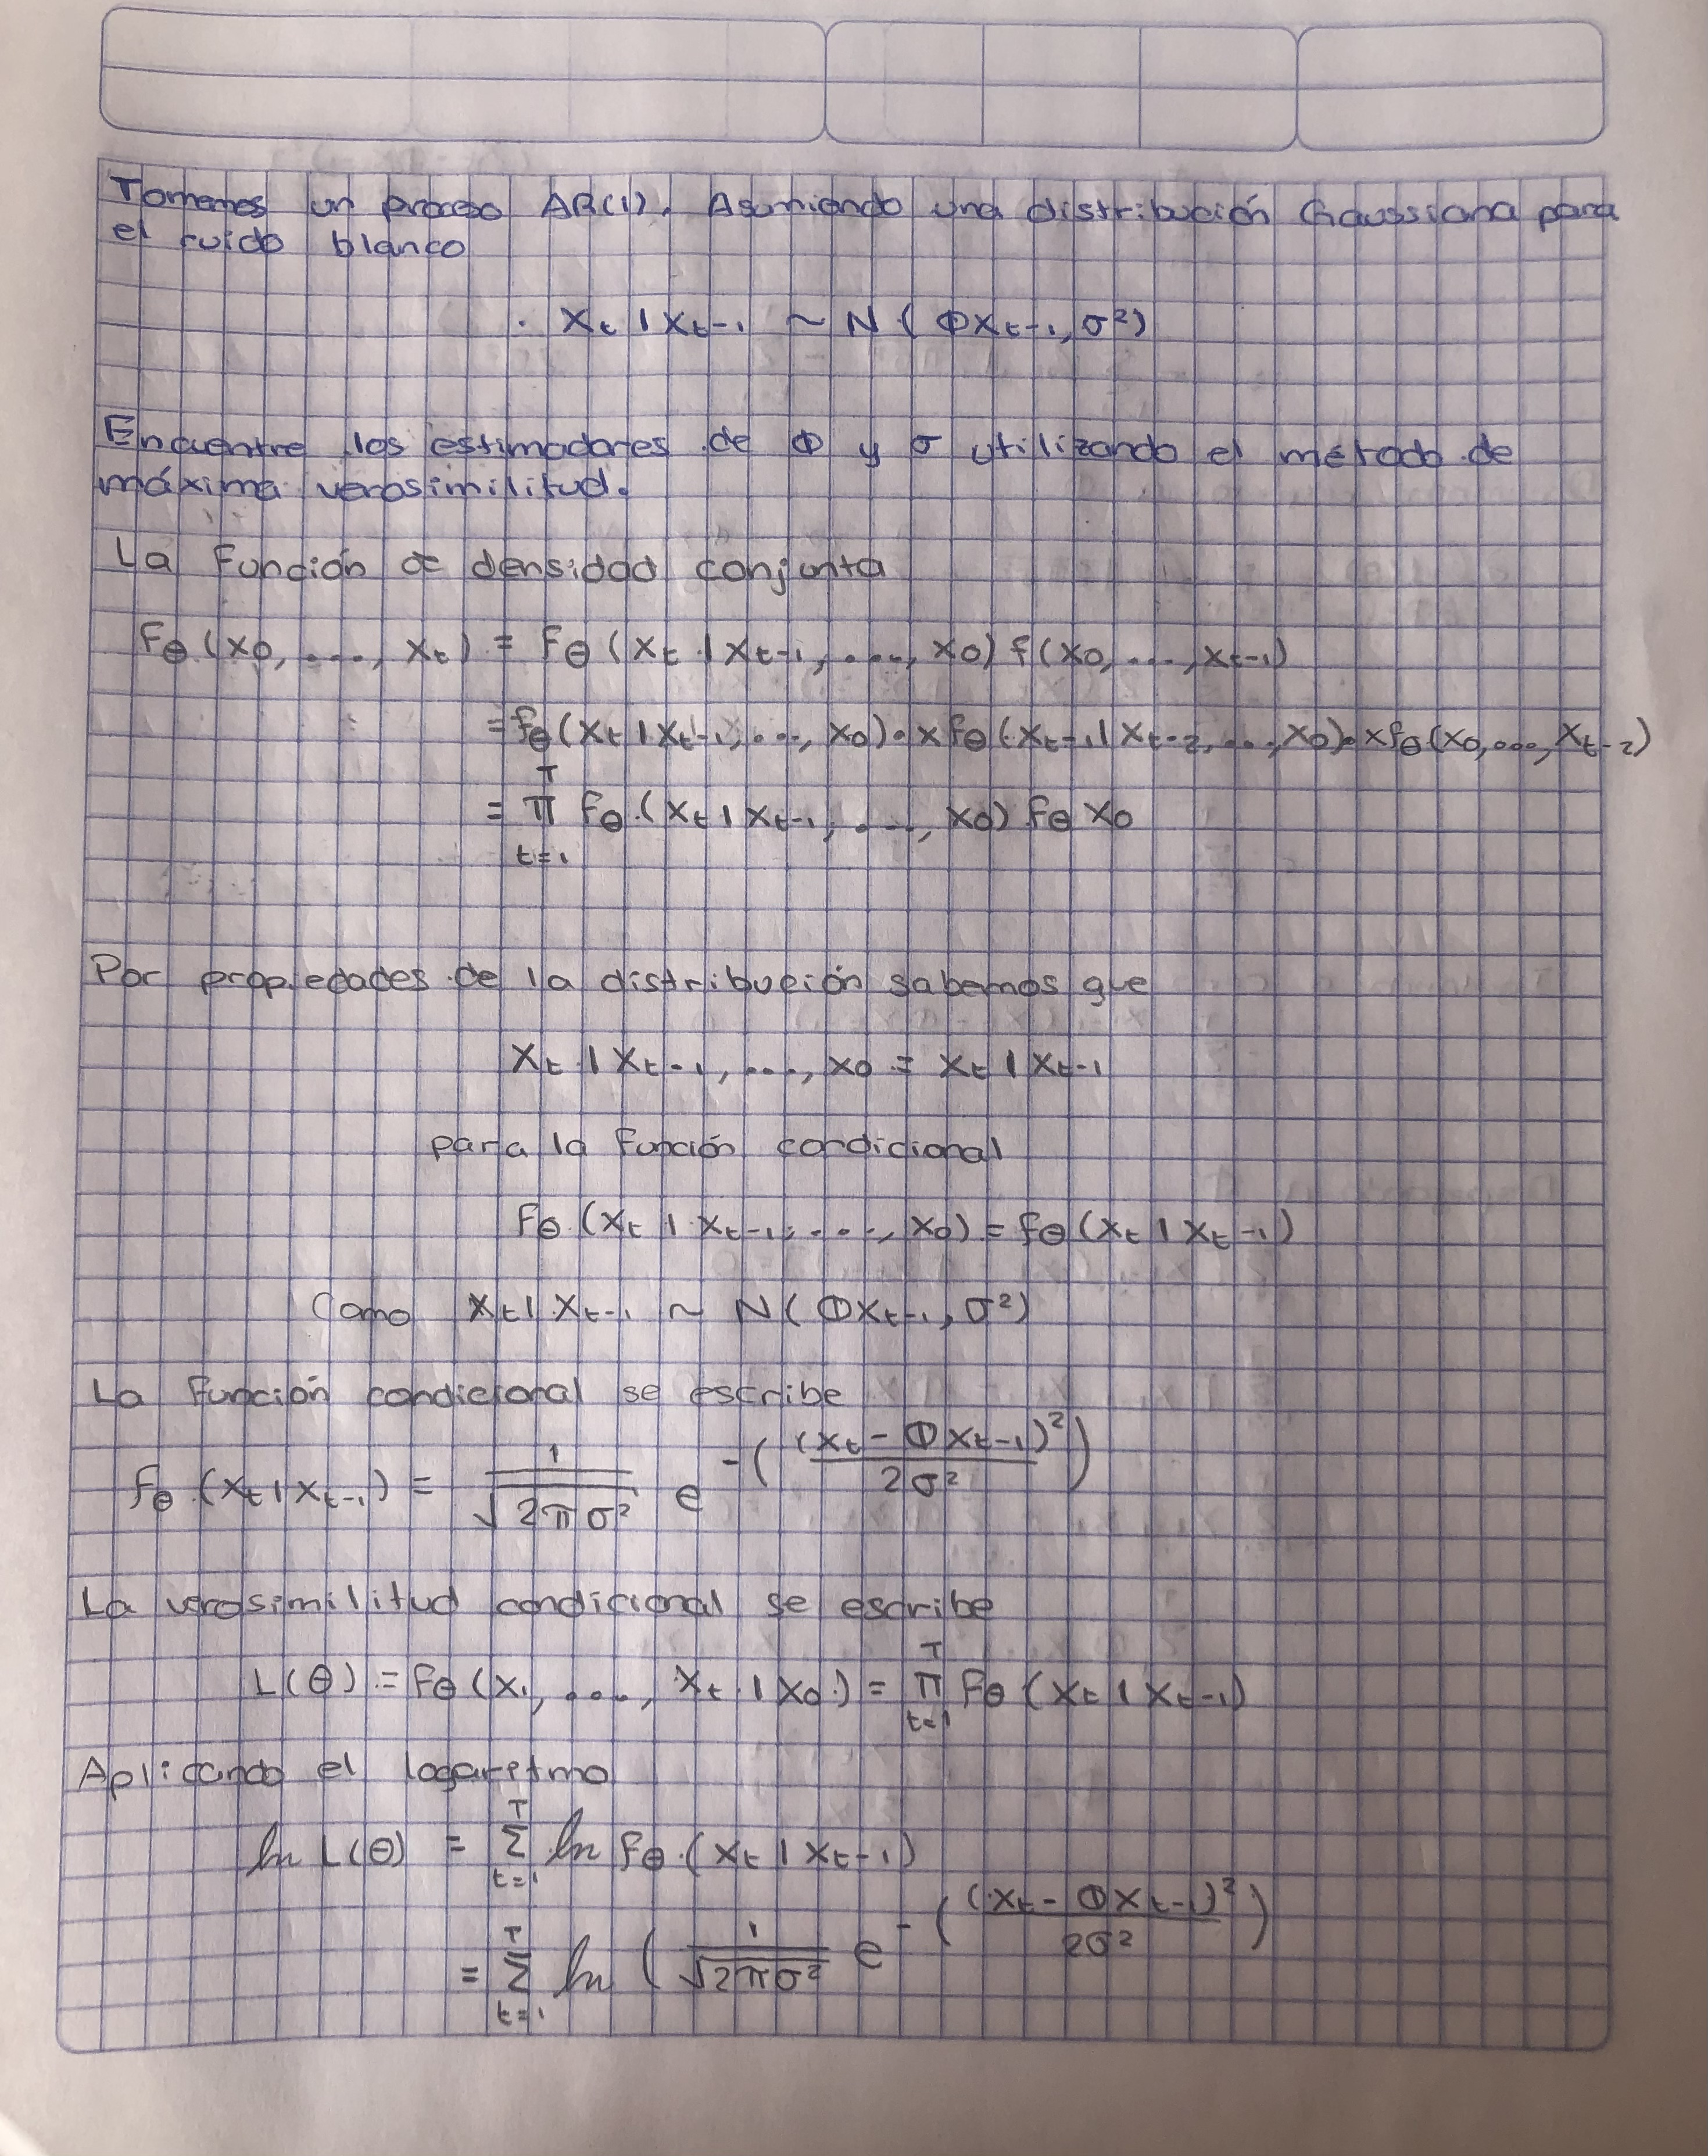

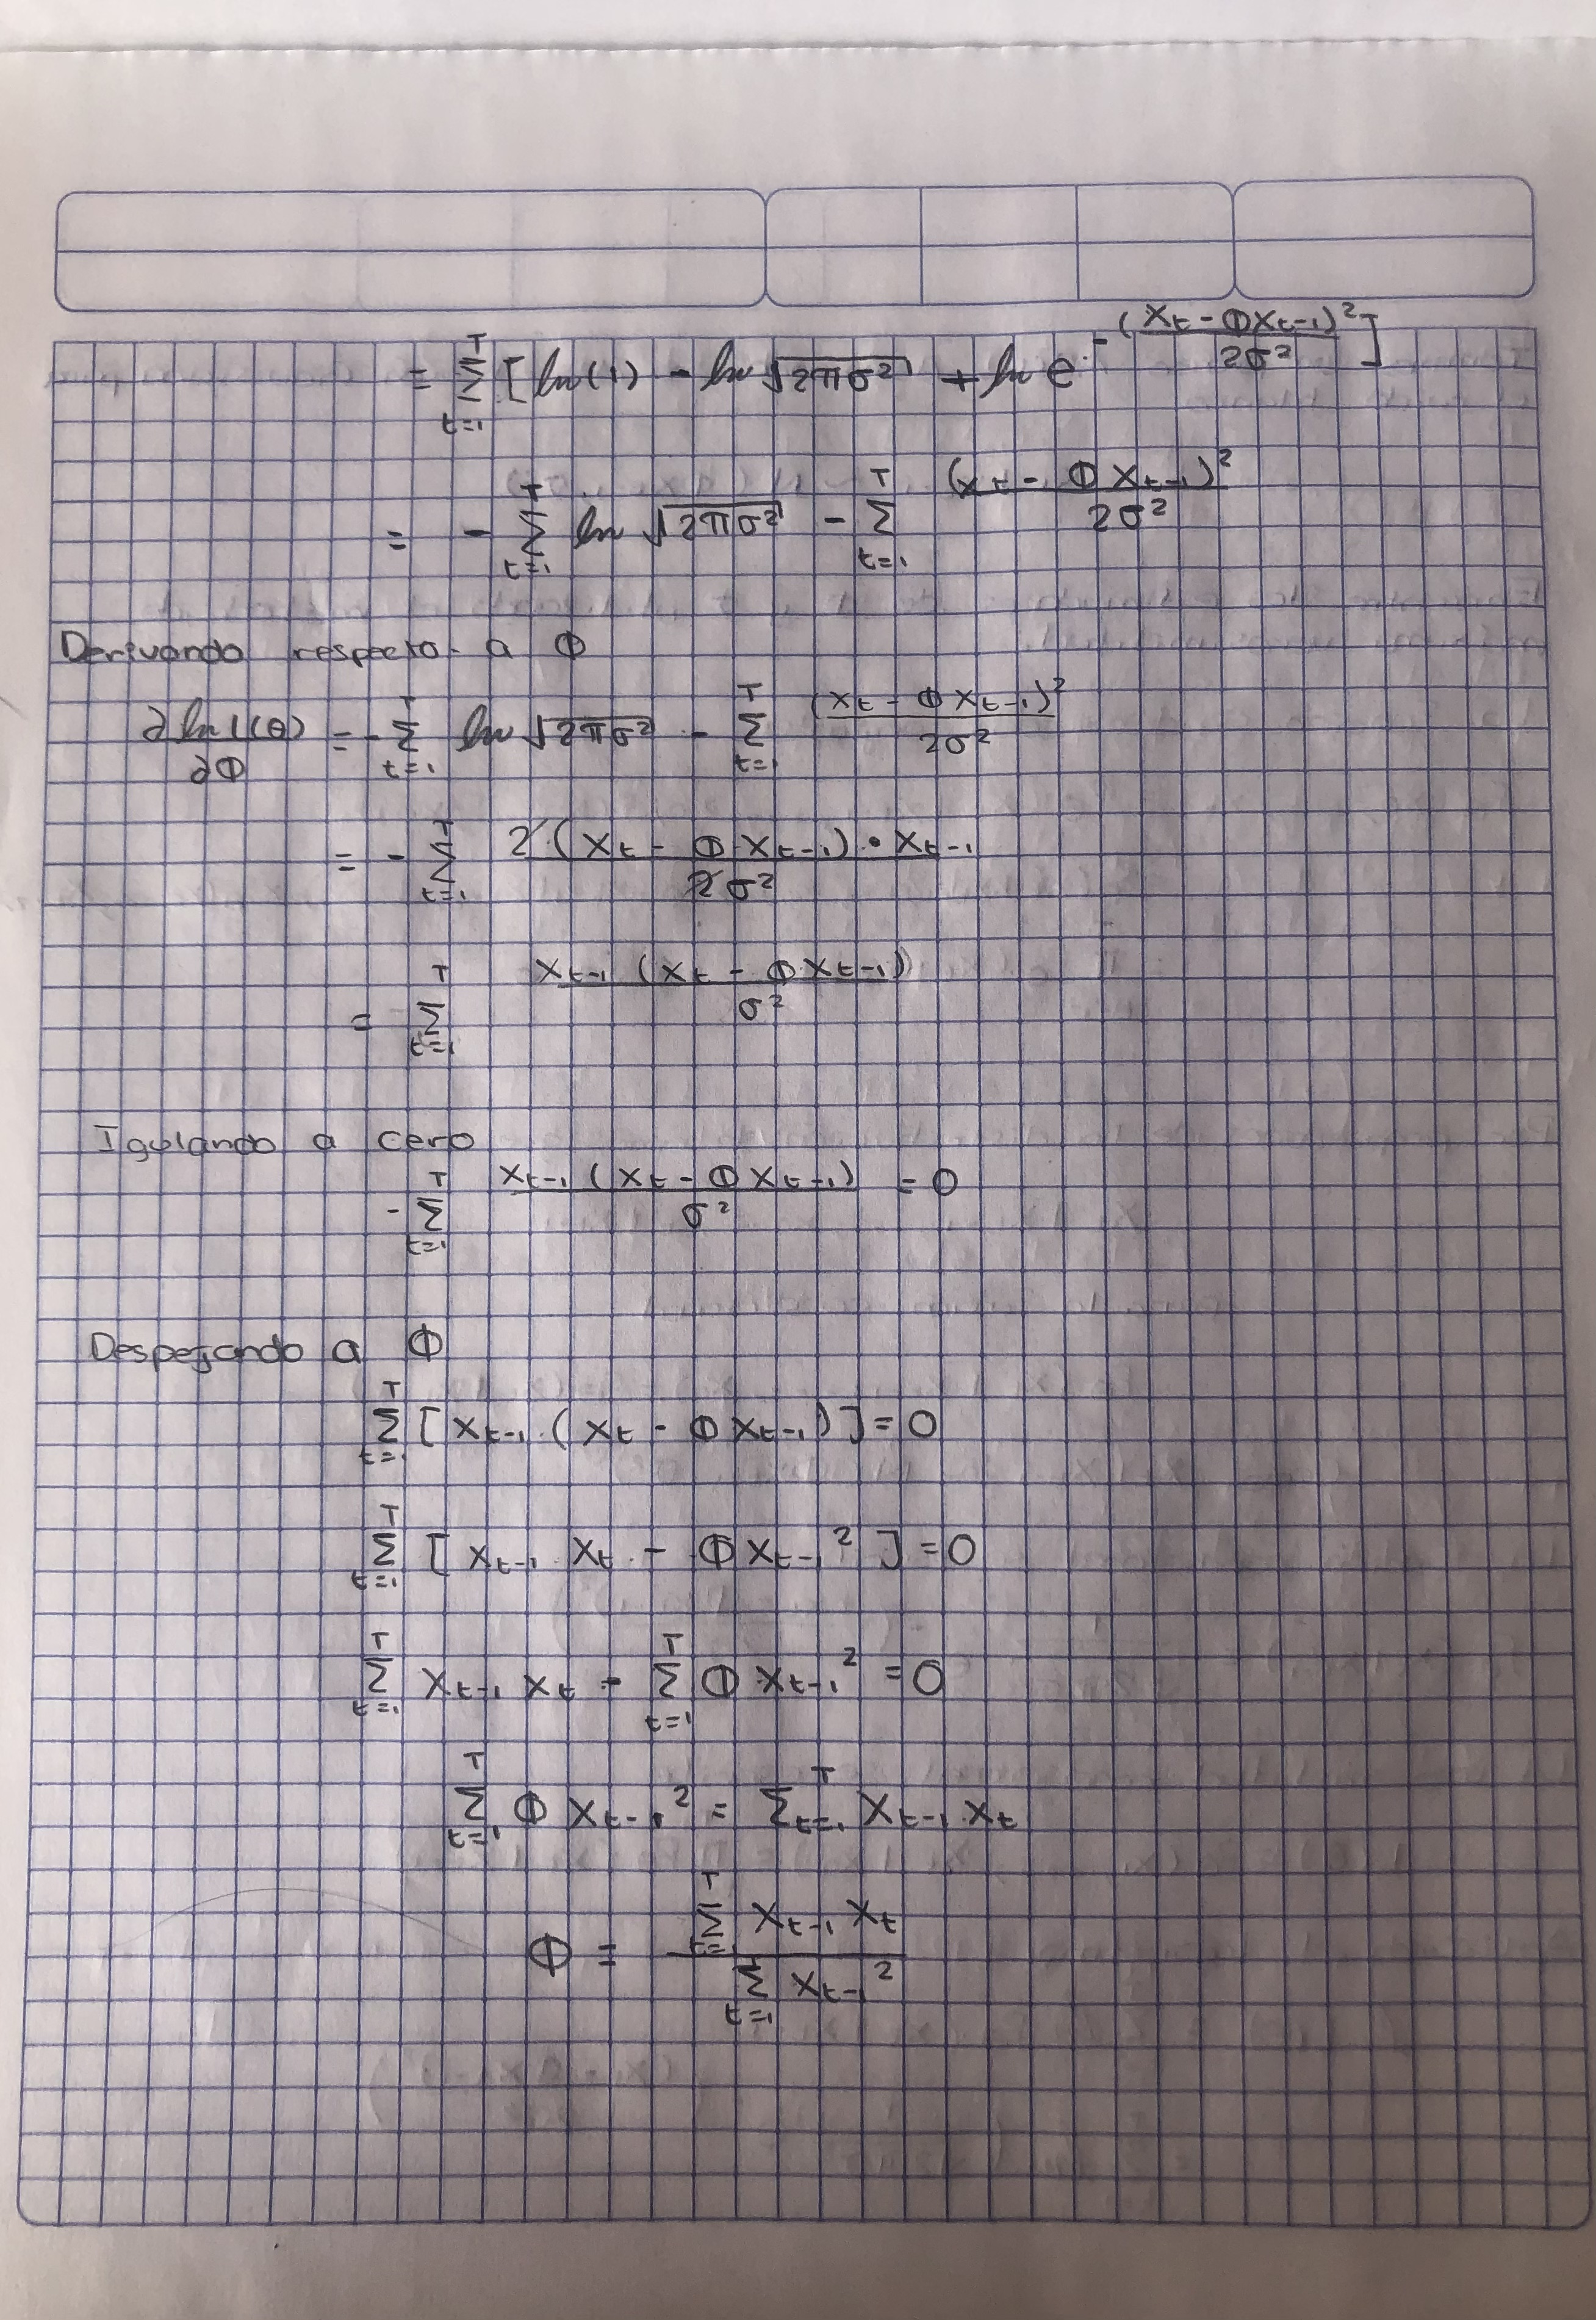

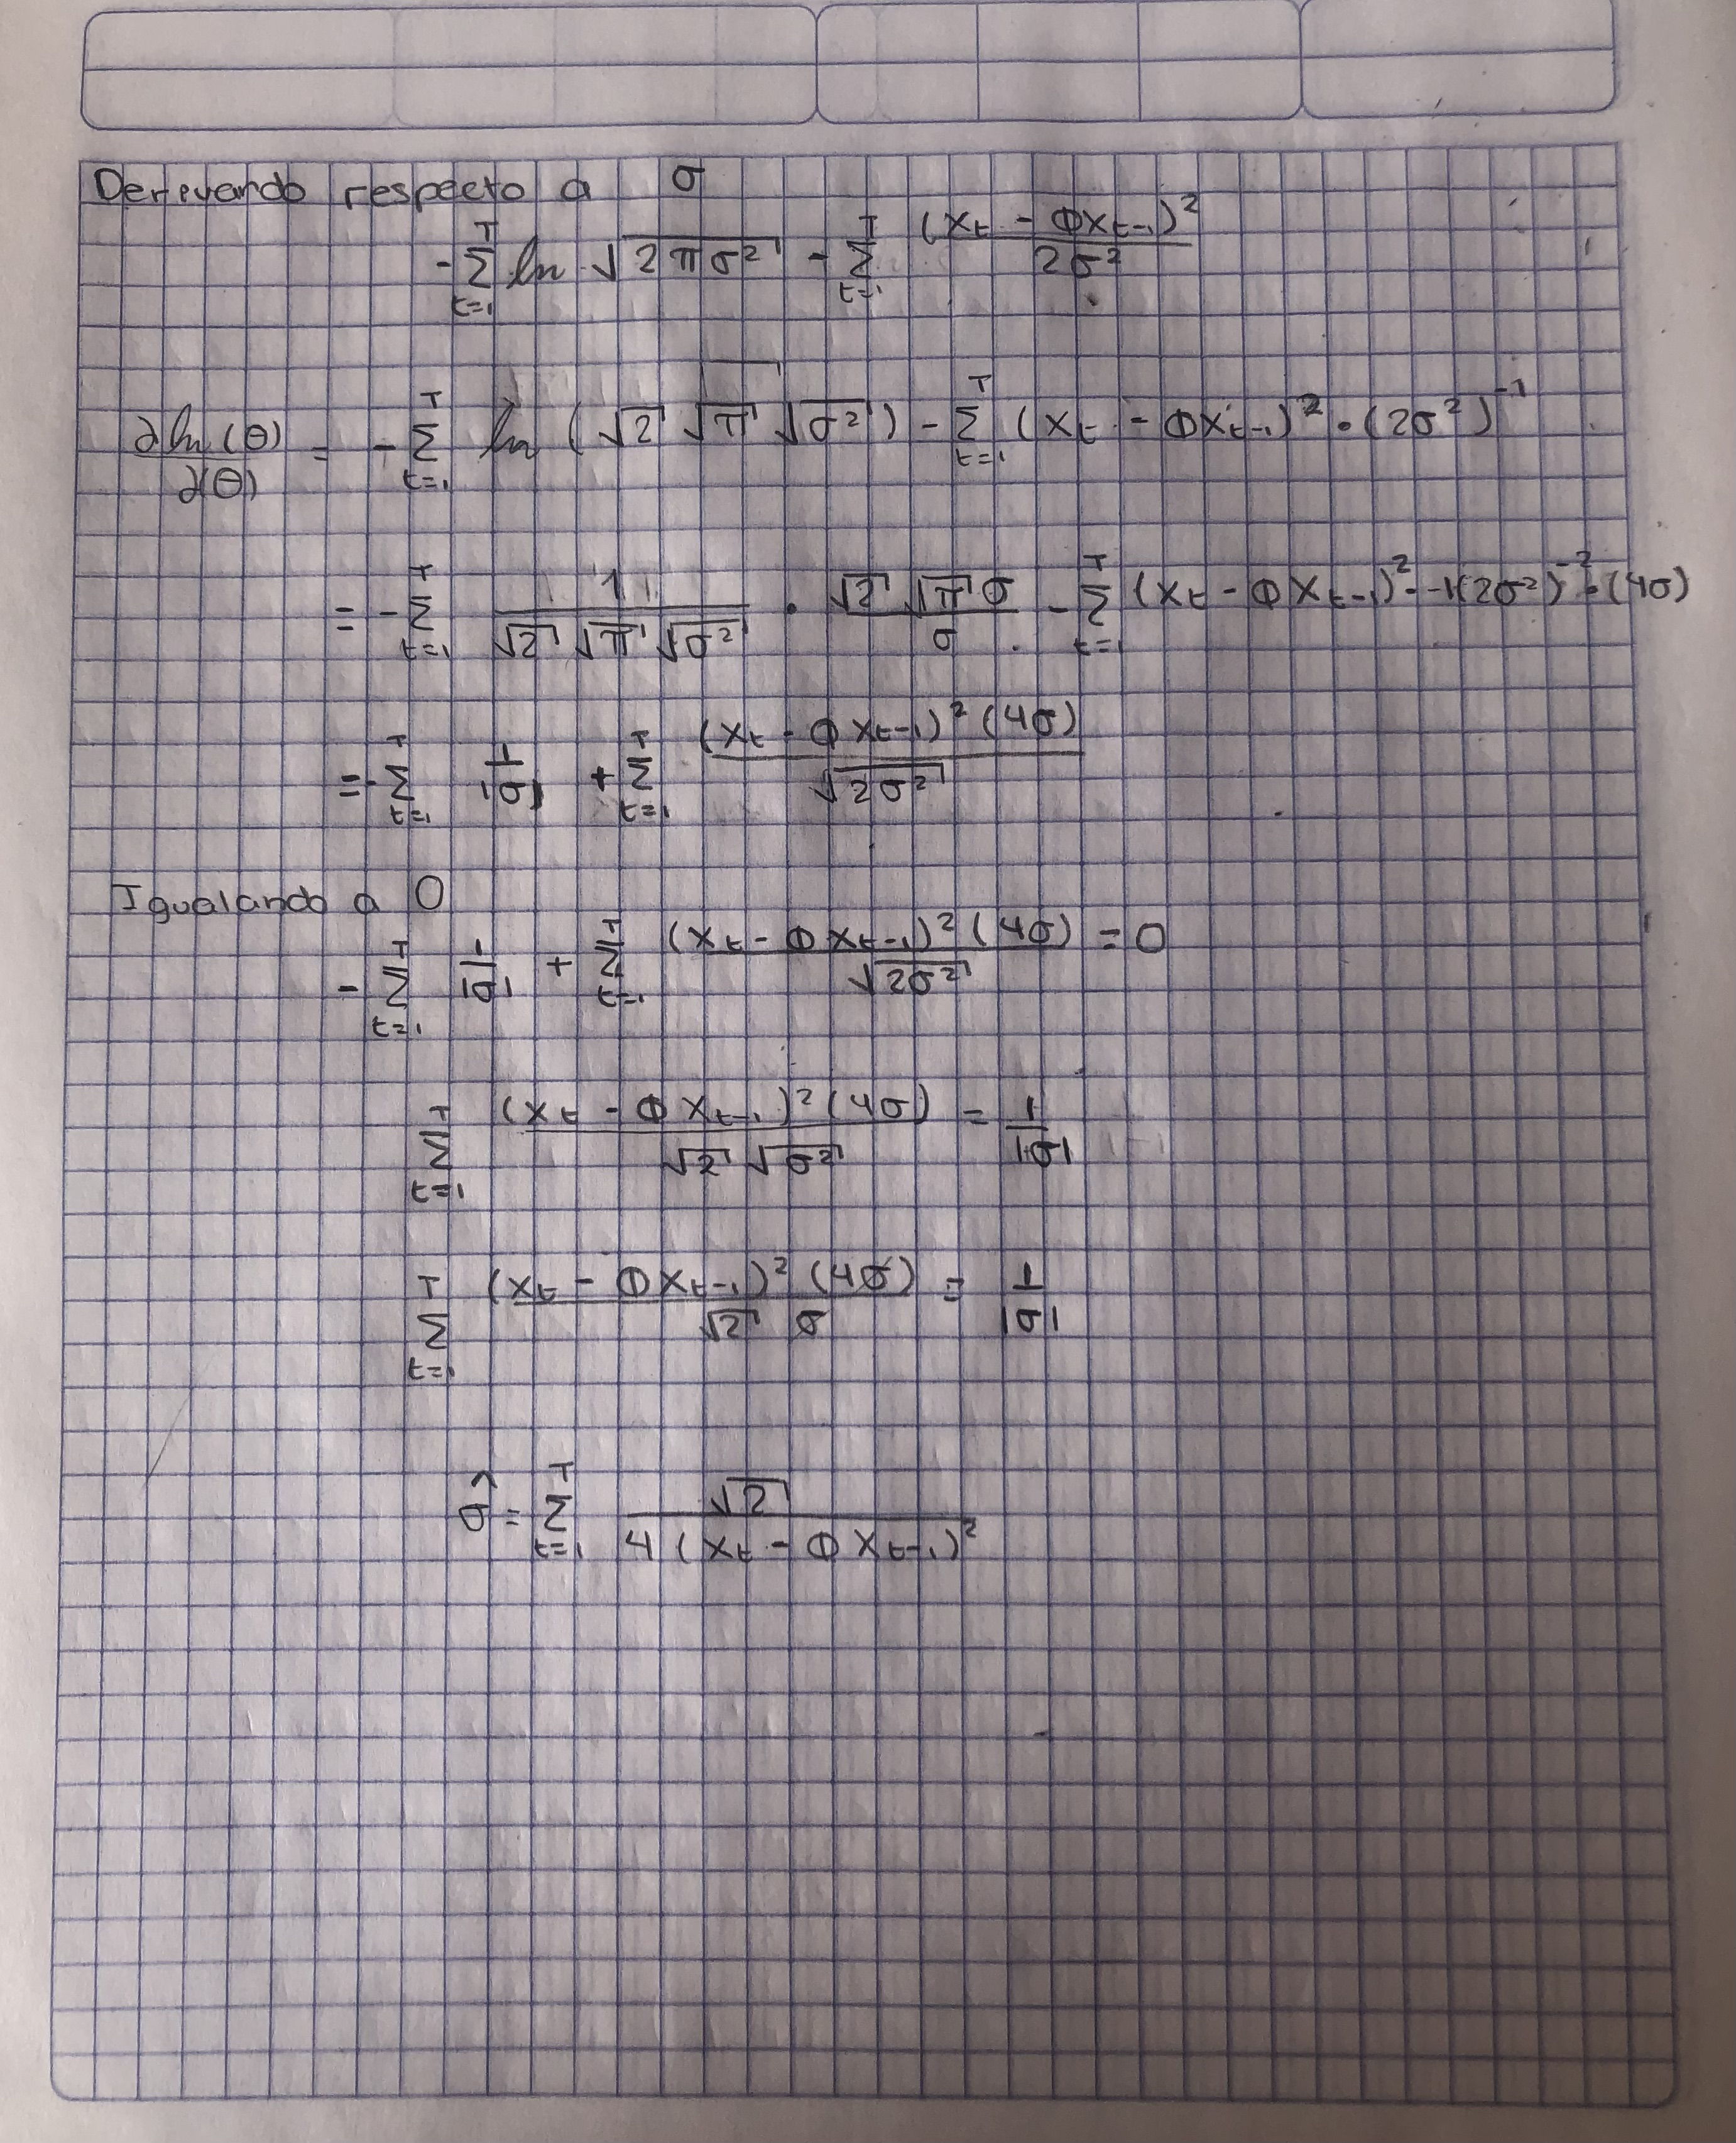

2. Uno de los indicadores más utilizados para determinar si el modelo utilizado en una serie de tiempo es el criterio
de información de Akaike (Akaike Information Criterion). Investigue en qué consiste dicho indicador y de una
breve explicación al respecto.

Este criterio es utilizado como una prueba de bondad de ajuste para la selección delo modelo mas adecuado para caracterizar los datos experimentales. La función de este modelo se unsa para describir la relación entre el sesgo y la varianza en la construcción del modelo, ya que, al momento de construir un modelo se pierde información pero el criterio AIC estima la cantidad de información perdida del modelo, un buen modelo no perderá una cantidad significante de información.
El criterio se define como:
$$AIC=-2log(𝓛(ϴ̂))+2K$$
Donde:


*   $log(𝓛(ϴ̂))$ es la función log-verosimilitud que permite determinar los parámetros libres del modelo.
*   K el número de parámetros del modelo

Cuando el modelo tiene un número elevado de K en relación con el tamaño de la muestra puede que tenga un error de sobreajuste por lo que se le aplica la correción de segundo orden por lo que quedaría de la siguiente manera:
$$AIC_c=AIC+ \frac{2K(k+1)}{n-K-1}$$






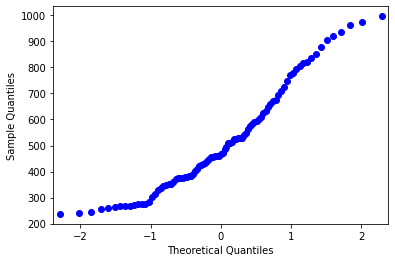

In [19]:
#3
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
 

US_PIB = pd.read_csv('/content/sample_data/gdp.csv')

graph=sm.qqplot(US_PIB.GDP)
plt.show()

In [37]:
US_PIB['Date'] = US_PIB['Date'].str.replace('/', '')
US_PIB['Date'] = US_PIB['Date'].str.replace(':', '')
US_PIB['Date'] = US_PIB['Date'].str.replace(' ', '')
US_PIB['Date'] = US_PIB['Date'].astype(float)

In [55]:
#3
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

def autocorrelacion(x, lag):
    y0 = x[:(len(x)-lag)]
    y1 = x[lag:]
    sp = np.sum((y1-np.mean(y0))*(y2-np.mean(y1)))
    return sp / ((len(x) - lag) * np.std(y0) * np.std(y1))

def acf(x, lag):
    y0 = x[:(len(x)-lag)]
    y1 = x[lag:]
    sp = np.sum((y0-np.mean(x))*(y1-np.mean(x)))
    return sp / ((len(x) - lag) * np.var(x))


In [39]:
model = sm.OLS(US_PIB.Date,US_PIB.GDP).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Date   R-squared (uncentered):                   0.634
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              155.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):                    2.40e-21
Time:                        18:48:36   Log-Likelihood:                         -1090.5
No. Observations:                  91   AIC:                                      2183.
Df Residuals:                      90   BIC:                                      2186.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
print(model.aic)

2183.0835456994932


In [1]:
#4
def PACF(k,series): 
    pacf_s=[]
    lag=[]
    acf=[]
    pacfs_1=[1,acf(1),(acf(2)-acf(1) * 2)/(1-acf(1) * 2)]

    def condition(tupla): 
        if tupla[0] is tupla[1]:
                return pacfs_1[tupla[0]]
        else:
            return  pacf_s[pacf_s.index(str(tupla[0])+str(tupla[1]))+1]

    def cond(tupla): 
        if tupla[0] is tupla[1]:
            return pacfs_1[tupla[0]]  
        else:
            return condition((tupla[0]-1,tupla[1]))-pacfs_1[tupla[0]]*condition((tupla[0]-1,tupla[0]-tupla[1]))

    for i in range(3,k+1):
        for t in range(1,t):
            if i-1!=t:
                pacf_s.append(str(i-1)+str(t))
                pacf_s.append(condin((i-1,t)))

        acf=[ACF(e) for e in range(1,t)]
        lag=[condition((i-1,l)) for l in range(1,i)]
        pacfs_1.append((ACF(i)-sum([lag*acf[x] for lag,x in zip(lag,range(len(acf)-1,-1,-1))]))
                /(1-sum([lag*acf for lag,acf in zip(lag,acf)])))
        
    return pacfs_1

Esta gráfica es de utilidad para hacer una comparar como esta distribuidos dos conjuntos de datos o para hacer una comparación entre un conjunto de datos con una distribución ideal teórica.


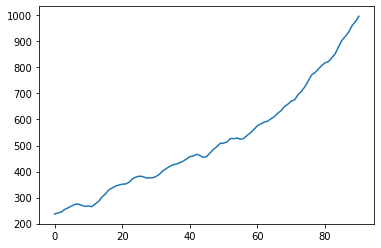

In [40]:
US_PIB.GDP.plot()

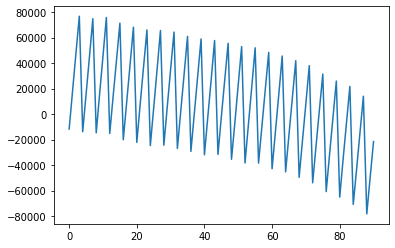

In [44]:
plt.plot(model.resid);

La grafica de los residuos parecieran ser normales sin embrago se puede notar que hay una ligera tendencia a la baja dado que la gráfica tiene un dirección hacia abajo.

In [49]:
from statsmodels.tsa.arima_process import arma_generate_sample
arparams = np.array([0.5])
maparams = np.array([-0.25])

arparams = np.r_[1, arparams]
maparams = np.r_[1, maparams]
nobs = 280
dta = arma_generate_sample(arparams, maparams, nobs)

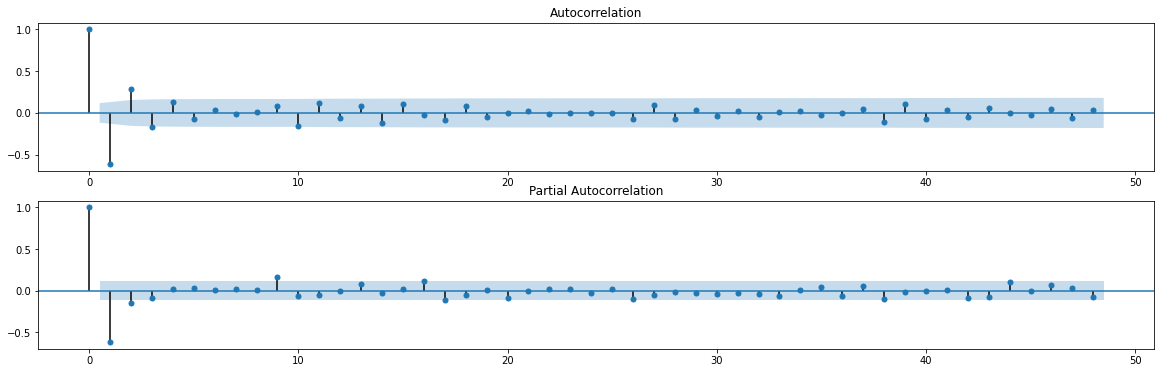

In [51]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta, lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=48, ax=ax2)